In [115]:
import pretty_midi
import numpy as np
import datapreparation as datp
reload(datp)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""
classical music dataset (downloaded bach, mozart, brahms and debussy) : http://www.piano-midi.de


lakh piano roll (not used) https://salu133445.github.io/lakh-pianoroll-dataset/dataset.html
"""

"""
helper libraries (via pip install):
pypianoroll for visualization
pretty_midi for data conversion
"""

In [60]:
### convert all mid to piano_roll
files=!ls /home/ahomec/e/eddasilv/datasets/classical/*.mid
for f in files:
    datp.midfile_to_piano_roll(f)

In [116]:
## load dataset of piano roll as csv
dataset = datp.load_all_dataset("/home/ahomec/e/eddasilv/datasets/classical")

In [ ]:
dataset_tags = datp.load_all_dataset_names("/home/ahomec/e/eddasilv/datasets/classical")

In [76]:
dataset_tags

['bach',
 'bach',
 'bach',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'brahms',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'debussy',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz',
 'mz']

In [83]:
print datp.get_max_length(dataset)
print datp.get_numkeys(dataset)

maxlength = datp.get_max_length(dataset)
numkeys = datp.get_numkeys(dataset)[0]

83091
[128]


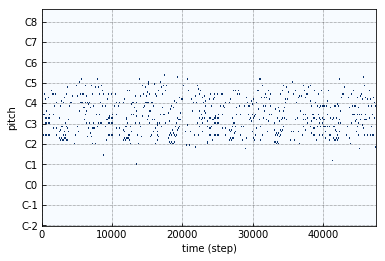

In [113]:
datp.visualize_piano_roll(dataset[-3])
